## A Simple Strategy Backtest

In [27]:
import bt
import warnings

# FutureWarning 무시 설정
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

| 티커 | 설명                                                                                   |
|------|----------------------------------------------------------------------------------------|
| SPY  | SPDR S&P 500 ETF. 미국의 대표적인 상장지수펀드로, S&P 500 지수를 추종. 대형주 500개로 구성된 지수를 반영. |
| AGG  | iShares Core U.S. Aggregate Bond ETF. 미국 전체 채권 시장을 추종하는 ETF. 정부 채권, 회사채, 자산유동화증권(ABS) 등이 포함. |


In [28]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
print(data.tail())

                   spy        agg
Date                             
2024-07-22  554.650024  98.010002
2024-07-23  553.780029  98.000000
2024-07-24  541.229980  97.699997
2024-07-25  538.409973  97.970001
2024-07-26  544.440002  98.320000


In [29]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [30]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


<Axes: title={'center': 'Equity Progression'}>

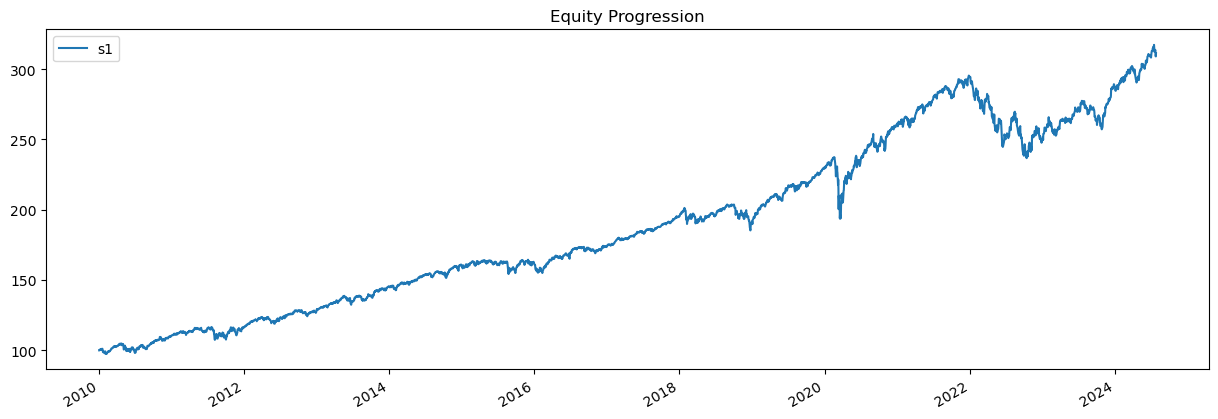

In [31]:
# first let's see an equity curve
res.plot()

In [32]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2024-07-26
Risk-free rate       0.00%

Total Return         211.25%
Daily Sharpe         0.93
Daily Sortino        1.45
CAGR                 8.11%
Max Drawdown         -19.87%
Calmar Ratio         0.41

MTD                  0.83%
3m                   5.82%
6m                   7.23%
YTD                  7.96%
1Y                   12.38%
3Y (ann.)            3.14%
5Y (ann.)            7.36%
10Y (ann.)           7.26%
Since Incep. (ann.)  8.11%

Daily Sharpe         0.93
Daily Sortino        1.45
Daily Mean (ann.)    8.19%
Daily Vol (ann.)     8.78%
Daily Skew           -0.71
Daily Kurt           13.90
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       1.02
Monthly Sortino      1.86
Monthly Mean (ann.)  8.33%
Monthly Vol (ann.)   8.16%
Monthly Skew         -0.34
Monthly Kurt         1.03
Best Month           7.57%
Worst Month          -6.68%

Yearly Sharp

| 항목                  | 설명                                                                          |
|-----------------------|-------------------------------------------------------------------------------|
| Start                 | 백테스트 시작 날짜                                                            |
| End                   | 백테스트 종료 날짜                                                            |
| Risk-free rate        | 무위험 이자율                                                                 |
| Total Return          | 총 수익률                                                                     |
| Daily Sharpe          | 일일 샤프 비율                                                                |
| Daily Sortino         | 일일 소르티노 비율                                                            |
| CAGR                  | 연평균 성장률                                                                 |
| Max Drawdown          | 최대 손실                                                                     |
| Calmar Ratio          | 칼마 비율                                                                     |
| MTD                   | 이번 달 수익률                                                                |
| 3m                    | 최근 3개월 수익률                                                             |
| 6m                    | 최근 6개월 수익률                                                             |
| YTD                   | 연초 이후 수익률                                                              |
| 1Y                    | 최근 1년 수익률                                                               |
| 3Y (ann.)             | 최근 3년 연평균 수익률                                                        |
| 5Y (ann.)             | 최근 5년 연평균 수익률                                                        |
| 10Y (ann.)            | 최근 10년 연평균 수익률                                                       |
| Since Incep. (ann.)   | 시작 이후 연평균 수익률                                                       |
| Daily Mean (ann.)     | 일일 평균 수익률의 연환산 값                                                  |
| Daily Vol (ann.)      | 일일 수익률의 연환산 변동성                                                   |
| Daily Skew            | 일일 수익률의 왜도                                                            |
| Daily Kurt            | 일일 수익률의 첨도                                                            |
| Best Day              | 최고의 하루 수익률                                                            |
| Worst Day             | 최악의 하루 수익률                                                            |
| Monthly Mean (ann.)   | 월간 평균 수익률의 연환산 값                                                  |
| Monthly Vol (ann.)    | 월간 수익률의 연환산 변동성                                                   |
| Monthly Skew          | 월간 수익률의 왜도                                                            |
| Monthly Kurt          | 월간 수익률의 첨도                                                            |
| Best Month            | 최고의 월간 수익률                                                            |
| Worst Month           | 최악의 월간 수익률                                                            |
| Yearly Mean           | 연평균 수익률                                                                 |
| Yearly Vol            | 연간 변동성                                                                   |
| Yearly Skew           | 연간 수익률의 왜도                                                            |
| Yearly Kurt           | 연간 수익률의 첨도                                                            |
| Best Year             | 최고의 연간 수익률                                                            |
| Worst Year            | 최악의 연간 수익률                                                            |
| Avg. Drawdown         | 평균 손실                                                                      |
| Avg. Drawdown Days    | 평균 손실 기간                                                                |
| Avg. Up Month         | 평균 상승 월간 수익률                                                         |
| Avg. Down Month       | 평균 하락 월간 수익률                                                         |
| Win Year %            | 연간 수익이 양수인 연도의 비율                                                 |
| Win 12m %             | 12개월 연속 수익이 양수인 기간의 비율                                           |


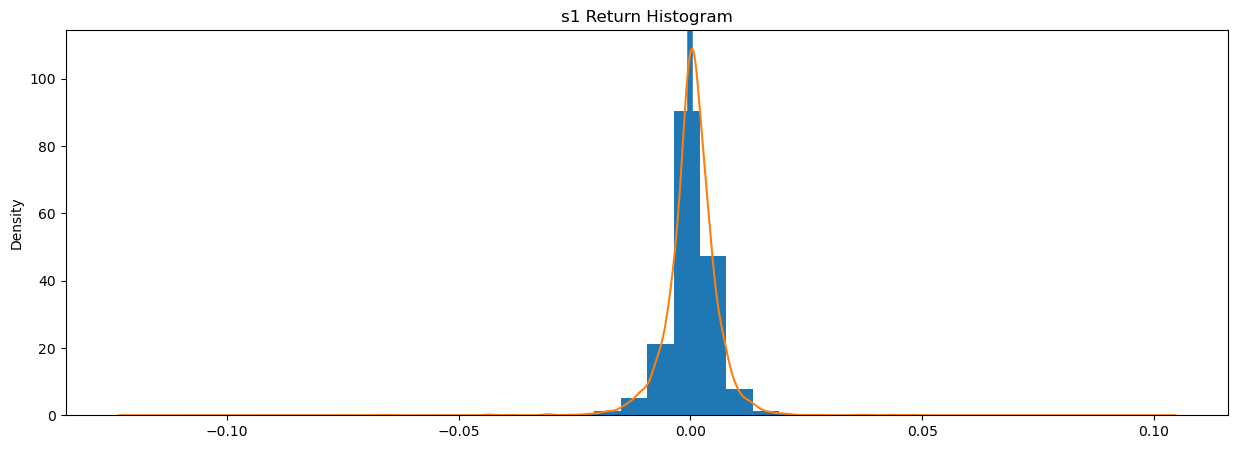

In [33]:
# ok and how does the return distribution look like?
res.plot_histogram()

### 히스토그램의 의미

1. **가로축 (X축)**:
   - 수익률(Returns)을 나타냅니다. 여기에는 음수와 양수의 수익률이 포함되어 있습니다.
   - 예를 들어, 0.00은 수익률이 0%임을 의미하며, -0.05는 수익률이 -5%, 0.05는 수익률이 5%임을 의미합니다.

2. **세로축 (Y축)**:
   - 밀도(Density)를 나타냅니다. 특정 수익률 구간에 얼마나 많은 데이터 포인트가 있는지를 나타냅니다.
   - 값이 높을수록 해당 수익률 구간에 더 많은 데이터 포인트가 있음을 의미합니다.

3. **파란색 막대**:
   - 각 구간의 실제 수익률 분포를 나타냅니다. 각 막대의 높이는 해당 구간에 속하는 수익률 데이터 포인트의 빈도를 나타냅니다.
   - 막대가 높을수록 해당 수익률 구간에 많은 관측치가 있음을 의미합니다.

4. **주황색 선**:
   - 수익률 분포의 커널 밀도 추정(Kernel Density Estimation, KDE)을 나타냅니다. 이는 수익률의 연속적인 분포를 부드럽게 나타내는 곡선입니다.
   - 이 선은 데이터의 밀도를 보다 부드럽게 보여주며, 수익률이 주로 어떤 범위에 분포하는지 시각적으로 이해하는 데 도움을 줍니다.

### 히스토그램 해석

- **정상 분포와의 비교**:
  - 히스토그램과 KDE 커브가 대체로 대칭적이며 중앙에 집중되어 있다면, 이는 수익률이 정상 분포에 가깝다는 것을 시사합니다.
  - 하지만, 비대칭성(왜도)이나 꼬리가 두꺼운 부분(첨도)이 존재한다면 이는 수익률 분포가 정규 분포와 다를 수 있음을 나타냅니다.

- **평균과 중앙값**:
  - 대부분의 수익률이 0% 근처에 모여 있다면, 이는 전략이 대부분의 기간 동안 큰 손실이나 큰 이익을 내지 않았음을 의미합니다.

- **리스크와 변동성**:
  - 수익률의 분포가 넓을수록 변동성이 크다는 것을 의미합니다. 즉, 막대가 넓은 범위에 걸쳐 분포되어 있다면, 이는 전략의 수익률이 더 큰 변동성을 보인다는 것을 나타냅니다.

이 히스토그램은 전략 `s1`의 성과가 대부분 작고 빈번한 수익률을 보이며, 큰 손실이나 큰 이익은 비교적 드물다는 것을 시사할 수 있습니다. 이를 통해 전략의 리스크 프로파일과 평균 수익률을 시각적으로 이해할 수 있습니다.

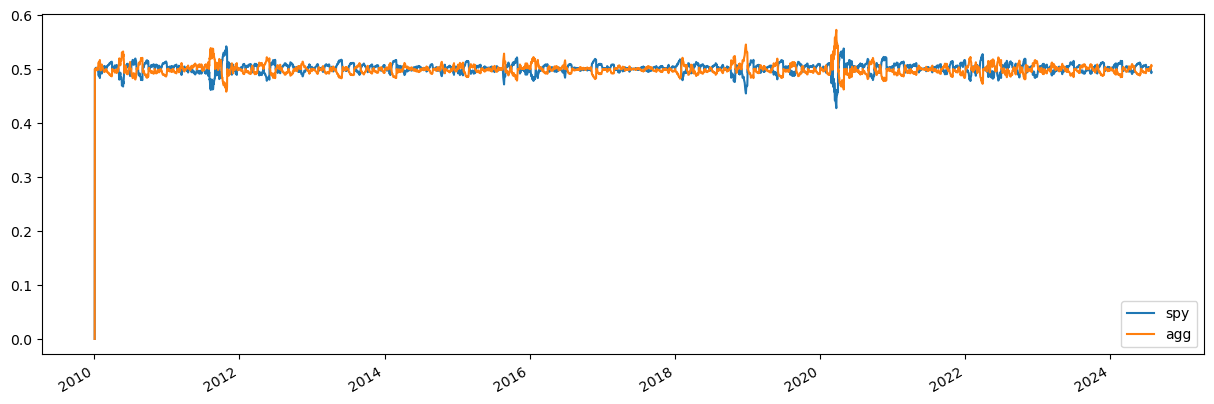

In [34]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

이 그래프는 `res.plot_security_weights()` 함수를 사용하여 생성된 것으로, 투자 포트폴리오 내에서 각 자산(SPY와 AGG)의 비중이 시간에 따라 어떻게 변화했는지를 보여줍니다. 다음은 이 그래프에 대한 자세한 설명입니다:

### 그래프 설명

1. **가로축 (X축)**:
   - 시간(Time)을 나타냅니다. 2010년부터 2024년까지의 기간을 커버합니다.
   - 이 축은 백테스트가 진행된 기간을 나타냅니다.

2. **세로축 (Y축)**:
   - 비중(Weights)을 나타냅니다. 0에서 0.6까지의 값으로 표현됩니다.
   - 각 자산이 포트폴리오 내에서 차지하는 비율을 나타냅니다.

3. **파란색 선 (SPY)**:
   - SPDR S&P 500 ETF(SPY)의 포트폴리오 내 비중을 나타냅니다.
   - 시간이 지남에 따라 SPY의 비중이 변동하는 것을 보여줍니다.

4. **주황색 선 (AGG)**:
   - iShares Core U.S. Aggregate Bond ETF(AGG)의 포트폴리오 내 비중을 나타냅니다.
   - 시간이 지남에 따라 AGG의 비중이 변동하는 것을 보여줍니다.

### 그래프 해석

- **초기 비중**:
  - 초기에는 AGG의 비중이 매우 높게 시작되고, SPY의 비중은 낮습니다. 이는 초기 투자 비중 설정의 결과일 수 있습니다.
  
- **비중 조정**:
  - 시간이 지남에 따라 두 자산의 비중이 거의 균등하게 유지되는 것을 볼 수 있습니다. 이는 `bt.algos.WeighEqually()`와 `bt.algos.Rebalance()` 알고리즘이 적용된 결과로, 매월 말에 포트폴리오를 재조정하여 두 자산의 비중을 동일하게 맞추기 때문입니다.

- **변동성**:
  - 두 자산의 비중이 약간의 변동을 보이지만, 대체로 0.5 부근에서 유지됩니다. 이는 주기적인 리밸런싱이 잘 수행되고 있음을 나타냅니다.
  - SPY와 AGG는 서로 반대 방향으로 움직이는 경향이 있으며, 이는 포트폴리오의 리스크를 관리하는 데 도움이 됩니다.

### 종합

이 그래프는 포트폴리오의 자산 비중이 시간에 따라 어떻게 변화하는지를 시각적으로 나타내며, 매월 리밸런싱을 통해 두 자산의 비중을 균등하게 유지하는 전략이 잘 실행되었음을 보여줍니다.

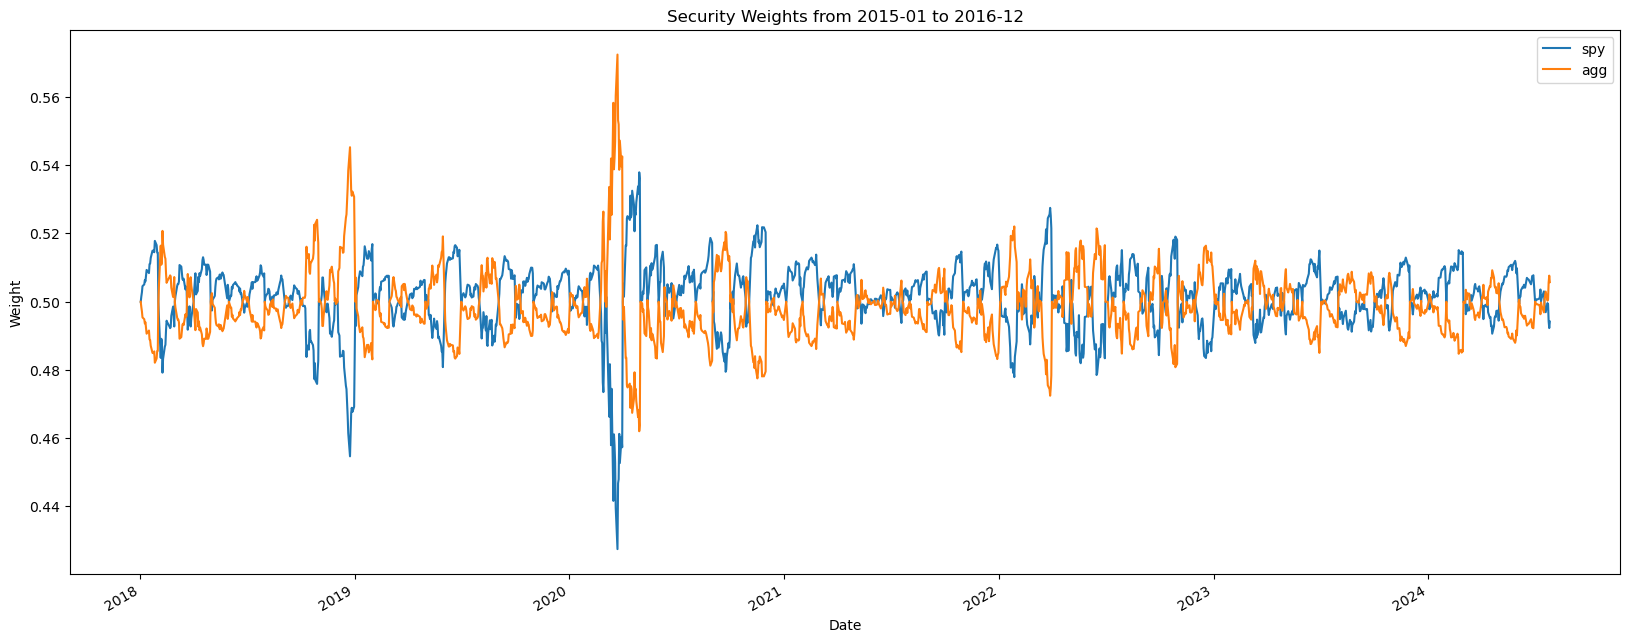

In [35]:
import matplotlib.pyplot as plt

# 포트폴리오 비중 데이터 가져오기
weights = res.get_security_weights()

# 특정 기간 필터링 (예: 2015년 1월부터 2016년 12월까지)
filtered_weights = weights.loc['2018-01-01':'2024-12-31']

# 필터링된 데이터로 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 8))  # 가로 길이를 20, 세로 길이를 8로 설정하여 더 길게 만듦
filtered_weights.plot(ax=ax)
ax.set_title('Security Weights from 2015-01 to 2016-12')
ax.set_xlabel('Date')
ax.set_ylabel('Weight')
ax.legend(loc='best')
plt.show()

## Modifying a Strategy

100%|██████████| 2/2 [00:00<00:00,  2.09it/s]


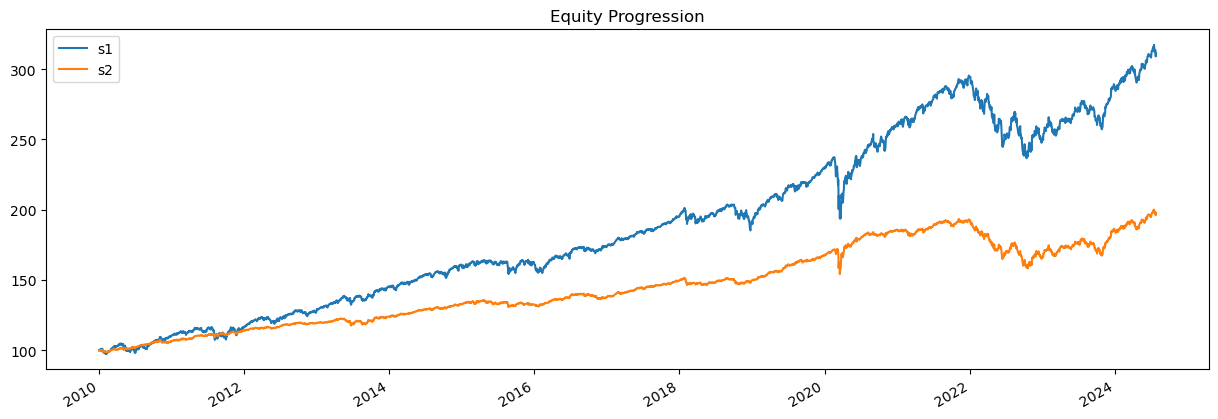

In [36]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

`bt` 라이브러리에서 정의된 새로운 전략 `s2`를 살펴보겠습니다. 이 전략은 다음과 같은 알고리즘을 사용하여 구성됩니다:

### 전략 구성 요소

1. **`bt.algos.RunWeekly()`**:
   - 이 알고리즘은 전략이 매주 한 번씩 실행되도록 합니다. 즉, 매주 말에 정의된 다른 알고리즘들이 실행됩니다.
   - 이 설정은 주간 리밸런싱을 의미합니다.

2. **`bt.algos.SelectAll()`**:
   - 이 알고리즘은 데이터셋에 있는 모든 자산을 선택합니다. 특정 자산을 필터링하거나 선택하는 대신, 데이터셋에 포함된 모든 자산에 대해 작업을 수행합니다.
   - 예를 들어, SPY와 AGG를 포함하는 데이터셋이라면, 이 두 자산을 모두 선택합니다.

3. **`bt.algos.WeighInvVol()`**:
   - 이 알고리즘은 자산의 역변동성에 따라 비중을 할당합니다. 변동성이 낮은 자산에 더 많은 비중을 할당하고, 변동성이 높은 자산에 적은 비중을 할당합니다.
   - 변동성은 자산의 리스크를 나타내며, 이 알고리즘은 리스크가 낮은 자산에 더 많이 투자하는 전략입니다.
   - 자산의 비중은 일반적으로 자산의 표준편차(변동성)의 역수로 계산됩니다.

4. **`bt.algos.Rebalance()`**:
   - 이 알고리즘은 포트폴리오를 재조정합니다. 설정된 비중에 맞추어 자산을 매매하여 포트폴리오를 조정합니다.
   - 매주 말에 선택된 비중에 맞추어 포트폴리오를 조정합니다.


### 설명

1. **데이터 불러오기**:
   - `bt.get('spy,agg', start='2010-01-01')`를 사용하여 데이터 불러옵니다.

2. **전략 정의**:
   - 매주 리밸런싱을 포함한 전략을 정의합니다.

3. **백테스트 실행**:
   - `bt.Backtest`와 `bt.run`을 사용하여 백테스트를 실행합니다.

4. **포트폴리오 비중 데이터 가져오기**:
   - `res.get_security_weights()`를 사용하여 포트폴리오 내 각 자산의 비중 데이터를 가져옵니다.

5. **특정 기간 필터링**:
   - `weights.loc['2015-01-01':'2016-12-31']`를 사용하여 원하는 기간의 데이터만 선택합니다.

6. **그래프 그리기**:
   - `matplotlib`를 사용하여 필터링된 데이터로 그래프를 그립니다.

이 방법을 사용하면 전략 `s2`의 포트폴리오 비중 변화를 시각적으로 확인할 수 있습니다.

In [37]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2024-07-26  2024-07-26
Risk-free rate       0.00%       0.00%

Total Return         211.25%     97.34%
Daily Sharpe         0.93        0.94
Daily Sortino        1.45        1.44
CAGR                 8.11%       4.78%
Max Drawdown         -19.87%     -18.01%
Calmar Ratio         0.41        0.27

MTD                  0.83%       1.05%
3m                   5.82%       5.17%
6m                   7.23%       5.84%
YTD                  7.96%       6.15%
1Y                   12.38%      10.14%
3Y (ann.)            3.14%       1.13%
5Y (ann.)            7.36%       4.13%
10Y (ann.)           7.26%       4.29%
Since Incep. (ann.)  8.11%       4.78%

Daily Sharpe         0.93        0.94
Daily Sortino        1.45        1.44
Daily Mean (ann.)    8.19%       4.81%
Daily Vol (ann.)     8.78%       5.12%
Daily Skew           -0.71       -1.06
Daily Kurt 

### 기능 설명

1. **트리 구조 (Tree Structure)**:
   - **설명**: 트리 구조는 모듈화되고 재사용 가능한 복잡한 알고리즘 트레이딩 전략을 구성하고 조합하는 데 도움을 줍니다. 각 트리 노드는 자체 가격 지수를 가지며, 이 지수는 알고리즘이 노드의 할당을 결정하는 데 사용됩니다.
   - **의미**: 이 구조는 전략을 계층적으로 관리할 수 있게 하여 복잡한 전략을 체계적으로 구성할 수 있습니다. 각 노드가 독립적으로 작동하면서도 전체 전략의 일부로 통합될 수 있어, 전략의 유연성과 확장성을 높입니다.

2. **알고리즘 스택 (Algorithm Stacks)**:
   - **설명**: 알고리즘과 알고리즘 스택은 모듈화되고 재사용 가능한 전략 논리를 쉽게 생성할 수 있도록 도와주는 핵심 기능입니다. 이러한 모듈화 덕분에 논리 블록을 쉽게 테스트할 수 있어 견고한 금융 솔루션을 구축하는 중요한 단계가 됩니다.
   - **의미**: 알고리즘 스택을 사용하면 작은 논리 블록을 만들어 조합하여 큰 전략을 구성할 수 있습니다. 이렇게 하면 각 블록을 개별적으로 테스트하고 최적화할 수 있어 전체 전략의 신뢰성과 성능을 높일 수 있습니다.

3. **거래 비용 모델링 (Transaction Cost Modeling)**:
   - **설명**: 커미션 함수와 백테스트에 전달된 금융상품별 시간 변동적인 매수/매도 스프레드를 사용하여 거래 비용을 모델링할 수 있습니다.
   - **의미**: 실제 거래에서는 거래 비용이 중요한 변수입니다. 이 기능을 통해 백테스트에서 거래 비용을 현실적으로 반영하여 보다 정확한 성과 평가를 할 수 있습니다.

4. **고정 수익 (Fixed Income)**:
   - **설명**: 전략은 채권과 같은 쿠폰 지급 금융상품, 스왑과 같은 비펀딩 금융상품, 보유 비용, 명목 가중치 옵션 등을 포함할 수 있습니다. 이는 트리 구조의 확장 기능입니다.
   - **의미**: 다양한 금융상품을 포함한 전략을 만들 수 있어, 단순 주식 거래 외에 채권, 스왑 등 다양한 자산 클래스를 포함하는 복합 전략을 구현할 수 있습니다.

5. **차트 및 보고 (Charting and Reporting)**:
   - **설명**: bt는 백테스트 결과를 시각화하는 데 도움이 되는 여러 유용한 차트 기능을 제공합니다. 앞으로 자동 생성 PDF 보고서와 같은 추가 차트, 테이블 및 보고서 형식을 추가할 계획입니다.
   - **의미**: 시각적 도구를 통해 백테스트 결과를 쉽게 이해하고 분석할 수 있습니다. 또한, 향후 추가될 보고서 기능을 통해 전략의 성과를 체계적으로 기록하고 공유할 수 있습니다.

6. **상세한 통계 (Detailed Statistics)**:
   - **설명**: bt는 백테스트와 관련된 다양한 통계를 계산하며, 다양한 백테스트 간의 이러한 통계를 비교하는 간단한 방법을 제공합니다.
   - **의미**: 다양한 성과 지표를 통해 전략의 성과를 다각도로 평가할 수 있으며, 여러 백테스트 결과를 쉽게 비교할 수 있어 전략의 개선 방향을 파악하는 데 유리합니다.
